<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/smiling_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

#from google.colab import files # 데이터 불러오기
#file_uploaded=files.upload()

Mounted at /content/drive/


In [8]:
pwd

'/content'

In [9]:
ls

drive/  sample_data/


In [11]:
cd/content/drive/MyDrive/cnn1

/content/drive/MyDrive/cnn1


In [17]:
ls

non_smile/  smile/


Text(0.5, 1.0, 'non_smile_adult')

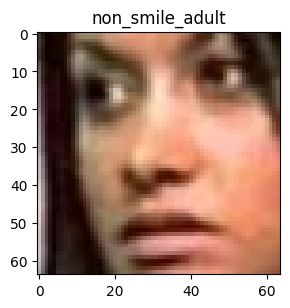

In [30]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

### 그림을 확인해 봅니다.

image_sample= imread('non_smile/Jacqueline_Marris_0001.jpg')
fig, ax = plt.subplots(figsize=(3, 5))
imshow(image_sample, ax=ax)
ax.set_title('non_smile_adult')
#ax.axis('off');


Text(0.5, 1.0, 'smile_adult')

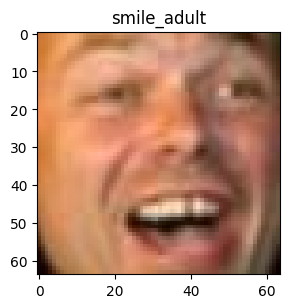

In [31]:
image_sample2= imread('smile/Jan_Bjoerklund_0001.jpg')
fig, ax = plt.subplots(figsize=(3, 5))
imshow(image_sample2, ax=ax)
ax.set_title('smile_adult')


In [32]:
image_sample2.shape

(64, 64, 3)

In [33]:
cd /

/


In [1]:
# ImageDataGenerator의 flow_from_directory를 사용하여 directory로 데이터를 입력

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

### ImageDataGenerator는 픽셀의 컬러 혹은 흑백값을 0에서 255를 0과 1사이로 바꾸어 줍니다. 이것은 필수입니다.
### ImageDataGenerator는 여러가지 옵션으로 사진의 갯수를 늘릴 수 있습니다.


### 아래는 train data에게 적용되는 옵션입니다.

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )


### 이제 /content/drive/MyDrive/data/train에 두개의 폴더 adults/  children/에서 train data로 쓸 그림을 가지고 옵니다.
### 그리고 각각 폴더에서 온 것을 [1,0]과 [0,1]를 정답으로 해서 불러옵니다.

train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/cnn1',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize, 사이즈를 원하는 모양으로 조절이 가능해요.
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=20,
                                              shuffle=True)


#### 아래는 validation_data에 사용할 data를 쓰는 것이라서 오직 크기를 변경하는 것만 하고, 다른 선택사항은 사용하지 않습니다.

valid_gen = ImageDataGenerator(
        rescale=1./255
    )


test = valid_gen.flow_from_directory(directory='../content/drive/MyDrive/cnn1',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='binary', # class_mode='binary',
                                              batch_size=3,
                                              shuffle=True)


# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
### [1,0]과 [0,1]이므로 위와 같이 했습니다.
### 만약 위에서 class_mode='binary'설정했다면, Dense(1,activation='sigmoid' )가 되여야 하고, 아래 compile을 loss=' binary_crossentropy'해야 합니다.

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, validation_data = test, epochs=5 )

Found 1203 images belonging to 2 classes.
Found 1203 images belonging to 2 classes.


<ipython-input-1-e1e86c19d0c2>:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, validation_data = test, epochs=5 )


Epoch 1/5
61/61 [==============================] - 207s 3s/step - loss: 1.9620 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 2/5
61/61 [==============================] - 206s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5029
Epoch 3/5
61/61 [==============================] - 204s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5062
Epoch 4/5
61/61 [==============================] - 205s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5071
Epoch 5/5
61/61 [==============================] - 205s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5121
